In [1]:
# default_exp core

# Core functions
> Some useful functions

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from nbdev.showdoc import *

In [4]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [5]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[-0.0903,  0.9113,  0.6694, -1.3920,  0.1339],
        [ 0.7349,  0.3779, -1.5943,  0.5563,  0.4600],
        [ 0.0208,  0.2800,  0.7989,  1.8362, -0.4254],
        [ 1.3601, -0.9809, -0.8411,  0.9528,  1.2383],
        [ 0.0425,  0.4642,  0.6475,  0.7277,  1.1650]])

In [6]:
stats(t)

(tensor(0.0411), tensor(1.0049))

## Cross Entropy Loss

Softmax of our activations is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

where $n$ is the number of classes.

In practice, we will need the log of the softmax when we calculate the loss.

In [7]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [8]:
log_softmax(t)

tensor([[-4.6284, -3.6268, -3.8687,  ..., -5.4442, -4.0726, -6.2651],
        [-3.8126, -4.1696, -6.1418,  ..., -3.6787, -4.8587, -6.2478],
        [-4.5411, -4.2819, -3.7630,  ..., -3.9835, -3.4205, -4.0742],
        ...,
        [-4.8409, -4.1168, -3.3972,  ..., -3.8314, -4.7069, -2.1857],
        [-3.7318, -2.9183, -3.6391,  ..., -5.9003, -5.3081, -6.5555],
        [-4.8845, -5.1436, -2.2432,  ..., -4.2983, -4.7480, -4.8116]])

In [9]:
def accuracy(pred,y):
    "Accuracy metric"
    return (pred.argmax(dim=1) == y).float().mean()

In [10]:
def error(pred,y):
    "Error metric"
    return 1-accuracy(pred,y)

In [11]:
def nll(pred,yb):
    "Negative Log Likelihood Loss function"
    return -pred[range(yb.shape[0]), yb].mean()

## Plotting

In [12]:
#export
def plotdist(x,showsigmas=True):
    "Plot distribution `x` with optional `showsigmas`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    if showsigmas: plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

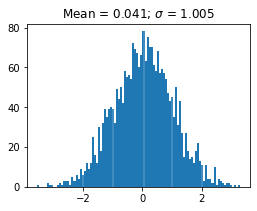

In [13]:
plotdist(t)

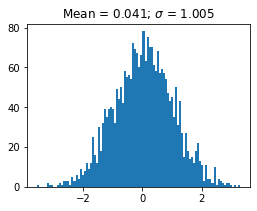

In [14]:
plotdist(t,showsigmas=False)

In [15]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
